## Load the data and split into train-test sets

In [77]:
from sklearn import datasets
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X, y = datasets.load_diabetes(as_frame=True, scaled=False, return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def model_estimation(model, y_train, y_test, y_pred_train, y_pred_test):
    """
    Evaluate the model using MAE. 
    Inputs:
        model: the model to be evaluated
        y_train: the true y values of the train dataset
        y_test: the true y values of the test dataset
        y_pred_train: the predicted y values of the train dataset
        y_pred_test: the predicted y values of the test dataset
    Returns:
        None. 
        Print the MAE of the train and test datasets and the equation of the model.
        Plots of the residuals, percentage error, and histogram of the percentage error.
    """
    # create three subplots in one row
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    # plot a scatter plot of the residuals
    ax1.scatter(y_test, y_test - y_pred_test)
    ax1.set_xlabel('$y_{test}$')
    ax1.set_ylabel('Residual $*(y_{test} - y_{pred}) / y_{test})$')
    ax1.set_title('Residuals')
    # plot a scatter plot of the percentage error
    ax2.scatter(y_test, 100. * (y_test - y_pred_test) / y_test)
    ax2.set_xlabel('$y_{test}$')
    ax2.set_ylabel('percentage error $100*(y_{test} - y_{pred}) / y_{test})$')
    ax2.set_title('Percentage error (%)')
    # plot a histogram of the percentage error
    ax3.hist(100. * (y_test - y_pred_test) / y_test, bins=20)
    ax3.set_xlabel('percentage error $100*(y_{test} - y_{pred}) / y_{test})$')
    ax3.set_ylabel('Frequency (number of test samples)')
    ax3.set_title('Histogram of percentage error (%)')

    print(f'Test Dataset: Mean Absolute Error: {mean_absolute_error(y_test, y_pred_test):.2f}')
    print(f'Train Dataset: Mean Absolute Error: {mean_absolute_error(y_train, y_pred_train):.2f}')

    print(f"Test Mean Absolute Percentage Error (MAPE): {mean_absolute_percentage_error(y_test, y_pred_test)}")
    print(f"Train Mean Absolute Percentage Error (MAPE): {mean_absolute_percentage_error(y_train, y_pred_train)}")

    # print the equation
    print('y = ', end='')
    for i, coef in enumerate(model.coef_):
        print(f'{coef:.2f} * x_{i} + ', end='')
    print(f'{model.intercept_:.2f}')
    fig.tight_layout()

## Exploring the data

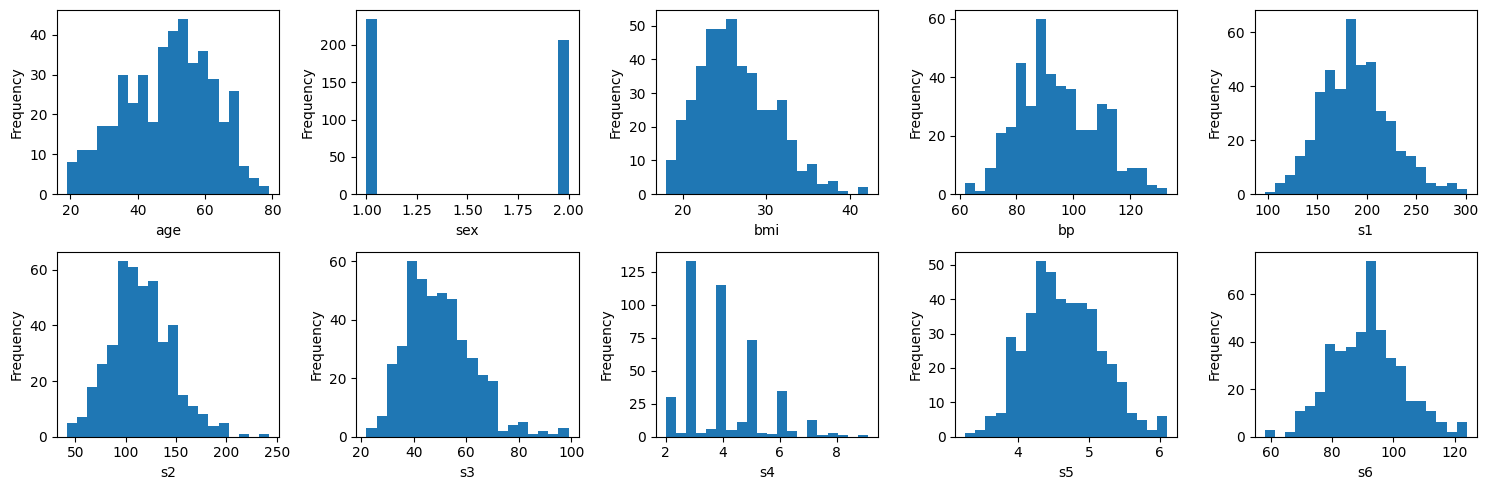

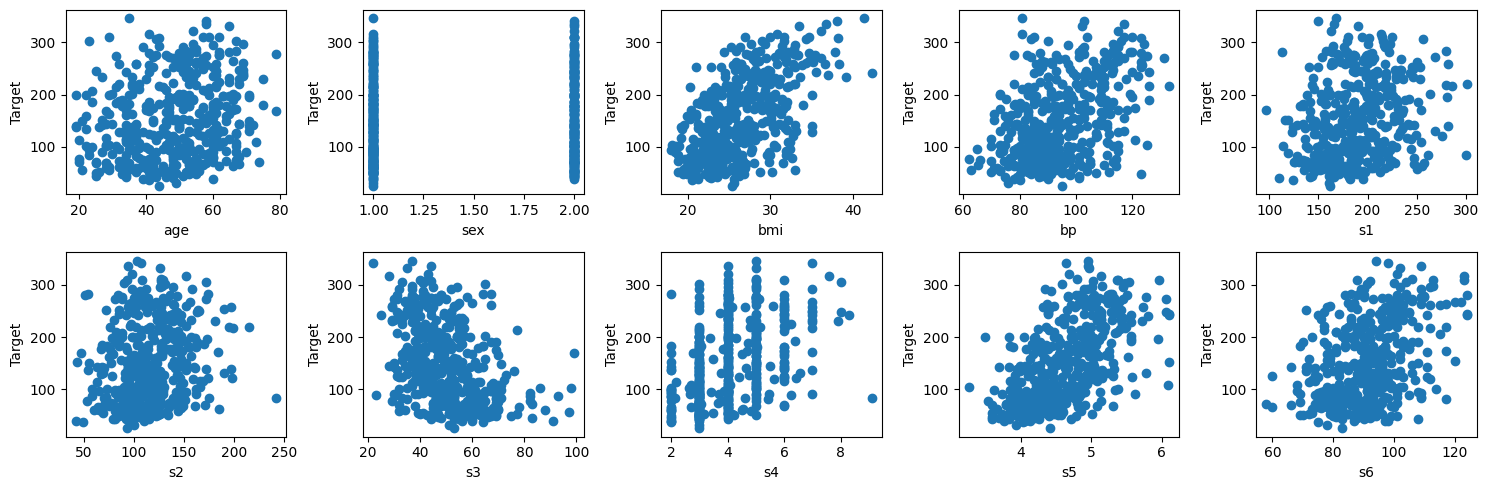

In [78]:
# plot a histogram of the features to see the distribution of the features
plt.figure(figsize=(15, 5))
for i in range(X.shape[1]):
    plt.subplot(2, 5, i + 1)
    plt.hist(X.iloc[:, i], bins=20)
    plt.xlabel(X.columns[i])
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# plot the current dataset to see the relationship between the features and the target 
# put the target on the y-axis, put the features on the x-axis
plt.figure(figsize=(15, 5))
for i in range(X.shape[1]):
    plt.subplot(2, 5, i + 1)
    plt.scatter(X.iloc[:, i], y)
    plt.xlabel(X.columns[i])
    plt.ylabel('Target')
plt.tight_layout()
plt.show()


## Run multivariate linear regression

['age' 'sex' 'bmi' 'bp' 's1' 's2' 's3' 's4' 's5' 's6']
10
Linear Regression:
Test Dataset: Mean Absolute Error: 42.79
Train Dataset: Mean Absolute Error: 43.48
Test Mean Absolute Percentage Error (MAPE): 0.3749982636756112
Train Mean Absolute Percentage Error (MAPE): 0.3891994714796052
y = 0.14 * x_0 + -23.06 * x_1 + 5.85 * x_2 + 1.20 * x_3 + -1.28 * x_4 + 0.81 * x_5 + 0.60 * x_6 + 10.16 * x_7 + 67.11 * x_8 + 0.20 * x_9 + -341.38


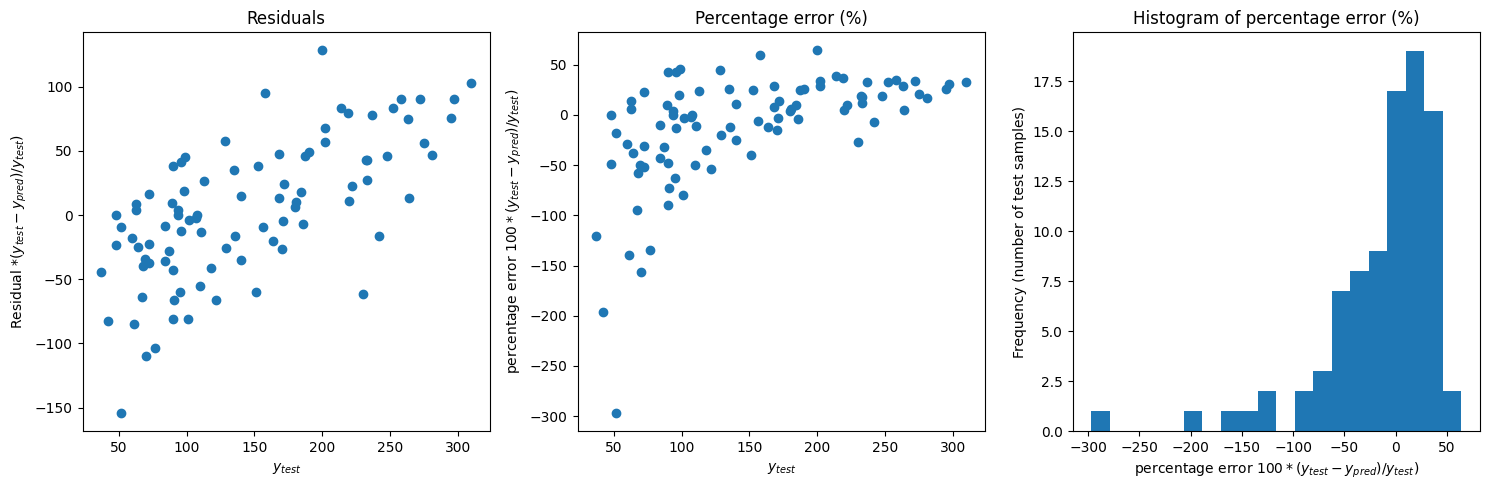

In [79]:
from sklearn.linear_model import LinearRegression
# Multivariate linear regression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# Predictions
y_pred_linear = linear_regressor.predict(X_test)

print(linear_regressor.feature_names_in_)
print(linear_regressor.n_features_in_)

# Evaluate the model
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mape_linear = mean_absolute_percentage_error(y_test, y_pred_linear)

print("Linear Regression:")

model_estimation(linear_regressor, y_train, y_test, linear_regressor.predict(X_train), y_pred_linear)

## Run multivariate polynomial regression

['1' 'age' 'sex' 'bmi' 'bp' 's1' 's2' 's3' 's4' 's5' 's6' 'age^2'
 'age sex' 'age bmi' 'age bp' 'age s1' 'age s2' 'age s3' 'age s4' 'age s5'
 'age s6' 'sex^2' 'sex bmi' 'sex bp' 'sex s1' 'sex s2' 'sex s3' 'sex s4'
 'sex s5' 'sex s6' 'bmi^2' 'bmi bp' 'bmi s1' 'bmi s2' 'bmi s3' 'bmi s4'
 'bmi s5' 'bmi s6' 'bp^2' 'bp s1' 'bp s2' 'bp s3' 'bp s4' 'bp s5' 'bp s6'
 's1^2' 's1 s2' 's1 s3' 's1 s4' 's1 s5' 's1 s6' 's2^2' 's2 s3' 's2 s4'
 's2 s5' 's2 s6' 's3^2' 's3 s4' 's3 s5' 's3 s6' 's4^2' 's4 s5' 's4 s6'
 's5^2' 's5 s6' 's6^2']
66

Polynomial Regression:
Test Dataset: Mean Absolute Error: 43.58
Train Dataset: Mean Absolute Error: 39.14
Test Mean Absolute Percentage Error (MAPE): 0.3828567851459372
Train Mean Absolute Percentage Error (MAPE): 0.3439024035035207
y = 0.00 * x_0 + -9.59 * x_1 + -11.24 * x_2 + -19.70 * x_3 + 10.64 * x_4 + -16.59 * x_5 + 26.14 * x_6 + 11.13 * x_7 + -160.29 * x_8 + -1768.67 * x_9 + -13.82 * x_10 + 0.03 * x_11 + 0.53 * x_12 + -0.05 * x_13 + 0.01 * x_14 + -0.00 * x_15 

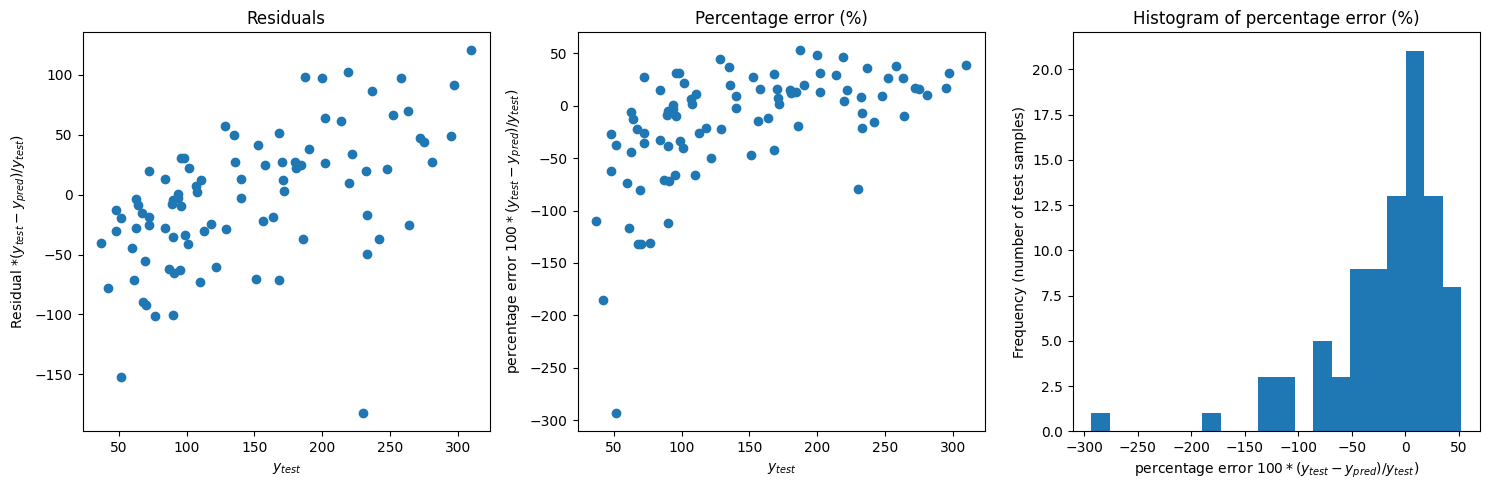

In [80]:
from sklearn.preprocessing import PolynomialFeatures
# Polynomial regression
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

poly_regressor = LinearRegression()
poly_regressor.fit(X_train_poly, y_train)

print(poly_features.get_feature_names_out())
print(len(poly_features.get_feature_names_out()))



# Predictions
y_pred_poly = poly_regressor.predict(X_test_poly)

# Evaluate the model
mae_poly = mean_absolute_error(y_test, y_pred_poly)
mape_poly = mean_absolute_percentage_error(y_test, y_pred_poly)

print("\nPolynomial Regression:")

model_estimation(poly_regressor, y_train, y_test, poly_regressor.predict(X_train_poly), y_pred_poly)


# Questions
1. How many parameters are we fitting for in linear regression and in the polynomial regression? Explain these values. Hint: for explaining the parameters of the polynomial regression, you can use poly.get_feature_names_out().

* ### Linear regression
* ['age' 'sex' 'bmi' 'bp' 's1' 's2' 's3' 's4' 's5' 's6']
10

* ### Polynomial regression
* ['1' 'age' 'sex' 'bmi' 'bp' 's1' 's2' 's3' 's4' 's5' 's6' 'age^2'
 'age sex' 'age bmi' 'age bp' 'age s1' 'age s2' 'age s3' 'age s4' 'age s5'
 'age s6' 'sex^2' 'sex bmi' 'sex bp' 'sex s1' 'sex s2' 'sex s3' 'sex s4'
 'sex s5' 'sex s6' 'bmi^2' 'bmi bp' 'bmi s1' 'bmi s2' 'bmi s3' 'bmi s4'
 'bmi s5' 'bmi s6' 'bp^2' 'bp s1' 'bp s2' 'bp s3' 'bp s4' 'bp s5' 'bp s6'
 's1^2' 's1 s2' 's1 s3' 's1 s4' 's1 s5' 's1 s6' 's2^2' 's2 s3' 's2 s4'
 's2 s5' 's2 s6' 's3^2' 's3 s4' 's3 s5' 's3 s6' 's4^2' 's4 s5' 's4 s6'
 's5^2' 's5 s6' 's6^2']
66

2. Which model would you choose for deployment, and why?

* I would choose Linear regression because it has a slightly lower MAE (42.79) compared to Polynomial Regression (43.58). This suggests that on average, the Linear Regression model's predictions are closer to the actual values. Linear Regression also has a slightly lower MAPE (0.3749982636756112) compared to Polynomial Regression (0.3828567851355605), indicating that the relative errors are slightly smaller.

* The polynomial regression performs better on the training dataset it captures the training data well but generalizes less effectively to unseen data.

3. What insights regarding the goodness-of-fit can you draw from the graphs provided by the function below, for each of the models?

* Residuals Plot:
Residuals should be randomly scattered around zero with no clear pattern. If the residuals are randomly scattered around zero, it indicates that the model is performing well and the errors are evenly distributed. If there's a systematic pattern or trend, it suggests that the model might not be capturing some aspects of the data.

* Percentage Error Plot:
Percentage errors should be scattered around zero with minimal spread. If the percentage errors are close to zero, it indicates good predictive accuracy. Large deviations indicate significant prediction errors for some samples, suggesting areas where the model may not be performing well.

* Histogram of Percentage Error:
Most errors should be close to zero, indicating that predictions are generally accurate. A concentration of errors around zero suggests that the model's predictions are generally accurate. A long tail in either direction indicates the presence of significant outliers or cases where the model performs poorly.